In [ ]:
#import pandas libary
import pandas as pd
import matplotlib.pyplot as plt

## How to read file csv in pandas

In [ ]:
#path = ('/Users/haleynguyen/Desktop/Learn Python/sales2019.csv') -- Absolute Path - another Folder
#path = ('sales2019.csv') -- Relative Path - Same Folder
#How to read file csv with pandas
path = ('sales2019.csv')
dataframe = pd.read_csv(path)
dataframe

### How to merge file in pandas

In [ ]:
df = pd.concat(map(pd.read_csv, ['sales2019_1.csv', 'sales2019_2.csv','sales2019_3.csv']), ignore_index=True)
df.to_csv('Merge_file.csv') #Create file csv with the result

### Add 'Month' is a new column

In [ ]:
path = ('Merge_file.csv')
dataframe = pd.read_csv(path)
dataframe['Month'] = dataframe['Order Date'].str.slice(0,2,1) #Slice string
print(set(dataframe['Month'])) #Print set of values of column


### Get and delete some values unwanted 'nan', 'Or'

In [ ]:
dataframe = dataframe.dropna() 
dataframe.head()
print(set(dataframe['Month']))

In [ ]:
#df[df['Month'] == 'Or'] #Check some info of column
dataframe = dataframe[dataframe['Month'] != 'Or']
print(set(dataframe['Month']))


## Reporting

### 1. Which month have most revenue?

In [ ]:
dataframe['Quantity Ordered'] = pd.to_numeric(dataframe['Quantity Ordered']) #Convert object to numeric 
#print(dataframe['Quantity Ordered'].dtypes) => Check type of column
dataframe['Price Each'] = pd.to_numeric(dataframe['Price Each'])
dataframe['Revenue'] = dataframe['Quantity Ordered'] * dataframe['Price Each']
dataframe

In [ ]:
dataframe.groupby(by=['Month']).sum()['Revenue'] #Get revenue group by Month

In [ ]:
sale_revenue = dataframe.groupby(by=['Month']).sum()['Revenue']
sale_revenue
print(f'{sale_revenue.idxmax()} is month have most revenue is: {sale_revenue.max()}')


### 2. Which month have most revenue?

In [ ]:
# Split after Comma - dau phay
# new_data = dataframe['Purchase Address'].str.split(',', n = 2, expand = True)
# city = new_data[1]

# Function get city name
# def getCity(sample_Adrress):
#     return sample_Adrress.split(',')[1]

# Funtion with lambda
getNameCity = lambda address: address.split(',')[1]


In [ ]:
dataframe['City'] = dataframe['Purchase Address'].apply(getNameCity)
dataframe.head()

In [ ]:
revenueByCity  = dataframe.groupby(by=['City']).sum()['Revenue'] #Get revenue group by city
revenueByCity.max()

In [ ]:
#Get uni or set of column
# cities = dataframe['City'].unique()
# cities = set(dataframe['Month'])
# Nhưng truyền cities vào như hai cách trên là sẽ gây ra lỗi là trục x không trùng khớp với kết quả như trong groupby
# Do đó cách tốt nhất là lấy kết quả từ trong dữ liệu sau khi group by luôn

# cities = []
# for city, revenue in revenueByCity.items():
#     cities.append(city)

# How to write faster, how to loop through pandas
cities = [city for city, revenue in revenueByCity.items()]
print(cities)

In [ ]:
months = range(1,3)
plt.bar(x=cities, height=revenueByCity)
plt.xlabel = 'City'
plt.ylabel = 'Revenue'
plt.xticks(cities, rotation = 45)
plt.show()

### 3. What time should we display ads to maximize the likelihood of customer's buying product?

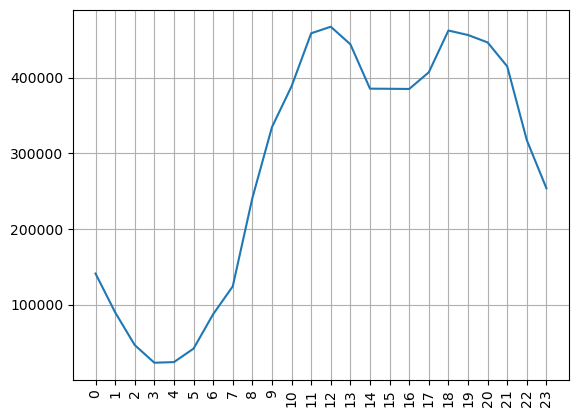

In [25]:
# Convert type to date
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe['Hour'] = dataframe['Order Date'].dt.hour

revenueByHours = dataframe.groupby(by=['Hour']).sum()['Revenue'] #Get revenue group by Hours

hours = [hours for hours, revenue in revenueByHours.items()]

months = range(1,3)
plt.plot(hours, revenueByHours) #Get line chart
plt.grid()
plt.xlabel = 'Hours'
plt.ylabel = 'Revenue'
plt.xticks(hours, rotation = 90)
plt.show()

###   Count order not by sale

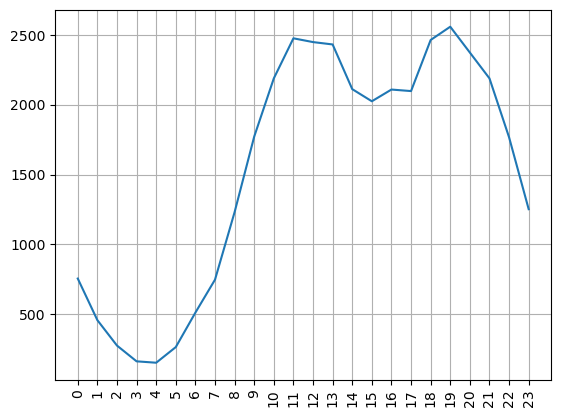

In [26]:
# Convert type to date
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe['Hour'] = dataframe['Order Date'].dt.hour

revenueByHours = dataframe.groupby(by=['Hour']).count()['Revenue'] #Get revenue group by Hours

hours = [hours for hours, revenue in revenueByHours.items()]

months = range(1,3)
plt.plot(hours, revenueByHours) #Get line chart
plt.grid()
plt.xlabel = 'Hours'
plt.ylabel = 'Revenue'
plt.xticks(hours, rotation = 90)
plt.show()

### 4. What products are most sold together?

In [33]:
#Find duplicate productID in one order
df_dup = dataframe[dataframe.duplicated(keep=False, subset=['Order ID'])]
df_dup.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
41,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [48]:
# dataframe['All_Product'] = df_dup.groupby('Order ID')['Product'].apply(groupProduct).reset_index()
# Không thể sử dụng apply() bởi vì khi sử dụng nó sẽ trả về một Dataframe 
# Nhưng chúng ta đang cần trả về một series vì vậy nên đổi từ apply() sang transfrorm)()
groupProduct = lambda product: ', '.join(product)
df_dup['All_Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

df_dup[['Order ID','All_Product']].drop_duplicates

/var/folders/zj/4sljh7px3ns7lyllfwp8zffw0000gq/T/ipykernel_786/2576711593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All_Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,All_Product
41,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11,"Vareebadd Phone, Wired Headphones"


In [54]:
# df_dup['All_Product'].value_counts().head(10)
df_dup['All_Product'].explode('All_Product').value_counts()

Google Phone, USB-C Charging Cable           380
iPhone, Lightning Charging Cable             354
iPhone, Wired Headphones                     162
Google Phone, Wired Headphones               128
Vareebadd Phone, USB-C Charging Cable        116
                                            ... 
27in FHD Monitor, LG Dryer                     2
Lightning Charging Cable, ThinkPad Laptop      2
Flatscreen TV, AA Batteries (4-pack)           2
Flatscreen TV, 34in Ultrawide Monitor          2
AAA Batteries (4-pack), 20in Monitor           2
Name: All_Product, Length: 240, dtype: int64